Exercise for the 3rd course week
Ex 1 Classes
Create 3 classes: Student, DataSheet and Course
A student has a data_sheet and a data_sheet has multiple courses in particular order
Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
In Student update __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
In DataSheet create a method to get_grades_as_list()
In student create a method: get_avg_grade()
Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
Read student data into a list of Students from a csv file (Each student can appear on multiple lines):
loop through the list and print each student with name, img_url and avg_grade.
sort the list by avg_grade
create a bar chart with student_name on x and avg_grade on y-axis
Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)
Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

In [1]:
class Student():
    def __init__(self,name,gender,data_sheet,img_url,stud_id=None):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.img_url = img_url
        self.stud_id = stud_id
        
    def __str__(self):
        return 'name: {name}, gender: {gender}, data_sheet: {data_sheet}, img_url: {img_url}.'.format(
        name=self.name, gender=self.gender, data_sheet=self.data_sheet,img_url=self.img_url)
    def __repr__(self):
        return 'Student(%r, %r, %r, %r, %r)' % (self.name, self.gender, self.data_sheet,self.img_url,self.stud_id)
    
    def get_avg_grade(self):
        grades = self.data_sheet.get_grades_as_list()
        return sum(grades)/len(grades)
    
    def get_progression(self):
        ECTS_total = 0
        for course in self.data_sheet.courses:
            ECTS_total += course.ECTS
            
        return (ECTS_total/150)*100
    

class DataSheet():
    def __init__(self,courses=[]):
        self.courses = courses
        self.course_index = 0
        
    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            grades.append(course.grade)
        return grades
    
    def __str__(self):
            return 'courses: {courses}.'.format(
            courses=self.courses)
    def __repr__(self):
        return 'DataSheet(%r)' % (self.courses)
    
    def __next__(self):
        course = self.courses[self.course_index]
        self.course_index +=1
        return course
    

class Course():
    def __init__(self,name,classroom,teacher,ECTS,grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = float(ECTS)
        self.grade=float(grade)
        
    def __str__(self):
        return 'name: {name}, classroom: {classroom}, teacher: {teacher}, ECTS: {ECTS}, grade: {grade}.'.format(
        name=self.name, classroom=self.classroom, teacher=self.teacher,ECTS=self.ECTS,grade=self.grade)
    def __repr__(self):
        return 'Course(%r, %r, %r, %r, %r)' % (self.name, self.classroom, self.teacher,self.ECTS,self.grade)

In [2]:
import names
import random as rnd
import csv

def generate_students(number_of_students):
    #grades = [-3,0,2,4,7,10,12]
    #courses = [Course('Math','CL_1','Hans',10,rnd.choice(grades)),Course('Sience','CL_2','Lars',10,rnd.choice(grades)),Course('English','CL_3','Peter',10,rnd.choice(grades)),Course('History','CL_4','Sven',10,rnd.choice(grades)),Course('Biology','CL_5','Helga',10,rnd.choice(grades))]
    students = []
    i=1
    while i < number_of_students+1:
        grades = [-3,0,2,4,7,10,12]
        courses = [Course('Math','CL_1','Hans',10,rnd.choice(grades)),Course('Sience','CL_2','Lars',10,rnd.choice(grades)),Course('English','CL_3','Peter',10,rnd.choice(grades)),Course('History','CL_4','Sven',10,rnd.choice(grades)),Course('Biology','CL_5','Helga',10,rnd.choice(grades))]
        gnd = rnd.choice(['male','female'])
        students.append(Student(names.get_full_name(gender=gnd),gnd,DataSheet(rnd.sample(courses,k=rnd.randrange(1,6))),'img_url',i))
        i+=1
    
    with open('students.csv', 'w') as file:
        output_writer = csv.writer(file)
        output_writer.writerow(['id','stud_name','course_name','teacher','gender','ects','classroom','grade','img_url'])
        
        for student in students:
            for course in student.data_sheet.courses:
                output_writer.writerow([student.stud_id,student.name,course.name,course.teacher,student.gender,course.ECTS,course.classroom,course.grade,student.img_url])
    


In [3]:
generate_students(10)

In [4]:
def read_students():
    students =[]

    with open('students.csv') as f:
        reader = csv.reader(f)
        header_row = next(reader)
        
        for row in reader:
            students.append(row)
    return students

print(read_students())


[['1', 'Christopher Falvo', 'Biology', 'Helga', 'male', '10.0', 'CL_5', '7.0', 'img_url'], ['1', 'Christopher Falvo', 'History', 'Sven', 'male', '10.0', 'CL_4', '4.0', 'img_url'], ['1', 'Christopher Falvo', 'Math', 'Hans', 'male', '10.0', 'CL_1', '12.0', 'img_url'], ['1', 'Christopher Falvo', 'Sience', 'Lars', 'male', '10.0', 'CL_2', '12.0', 'img_url'], ['1', 'Christopher Falvo', 'English', 'Peter', 'male', '10.0', 'CL_3', '0.0', 'img_url'], ['2', 'Dante Price', 'Biology', 'Helga', 'male', '10.0', 'CL_5', '7.0', 'img_url'], ['2', 'Dante Price', 'Math', 'Hans', 'male', '10.0', 'CL_1', '12.0', 'img_url'], ['2', 'Dante Price', 'Sience', 'Lars', 'male', '10.0', 'CL_2', '4.0', 'img_url'], ['2', 'Dante Price', 'English', 'Peter', 'male', '10.0', 'CL_3', '4.0', 'img_url'], ['3', 'Raphael Whittaker', 'Sience', 'Lars', 'male', '10.0', 'CL_2', '2.0', 'img_url'], ['4', 'Lois Daniels', 'Biology', 'Helga', 'female', '10.0', 'CL_5', '10.0', 'img_url'], ['4', 'Lois Daniels', 'Math', 'Hans', 'female',

In [5]:
def get_student_objects(student_list):
    student = []
    students = []
    student_id = '0'
    student_id_prev = '0'
    student_courses =[]
    
    for line in student_list:
        student_id = line[0]
        
        if student_id == student_id_prev:
            student.append(line)
        else:
            student_id_prev = line[0]
            if len(student) > 0:
                for student_info in student:
                    student_courses.append(Course(student_info[2],student_info[6],student_info[3],student_info[5],student_info[7]))
                students.append(Student(student_info[1],student_info[4],DataSheet(student_courses),student_info[-1],student_info[0]))
                student_courses=[]
                student = []
                student.append(line)
            else:
                student.append(line)
                
    if len(student) > 0:
        for student_info in student:
            student_courses.append(Course(student_info[2],student_info[6],student_info[3],student_info[5],student_info[7]))
        students.append(Student(student_info[1],student_info[4],DataSheet(student_courses),student_info[-1],student_info[0]))
        
    return students

In [6]:
for student in get_student_objects(read_students()):
    print('-----------')
    print(f'name: {student.name}')
    print(f'AVG grade: {student.get_avg_grade()}')
    print(f'image_url: {student.img_url}')
    print('-----------')

-----------
name: Christopher Falvo
AVG grade: 7.0
image_url: img_url
-----------
-----------
name: Dante Price
AVG grade: 6.75
image_url: img_url
-----------
-----------
name: Raphael Whittaker
AVG grade: 2.0
image_url: img_url
-----------
-----------
name: Lois Daniels
AVG grade: 4.0
image_url: img_url
-----------
-----------
name: Rebecca Wipf
AVG grade: 3.25
image_url: img_url
-----------
-----------
name: Hayden Hudson
AVG grade: 0.0
image_url: img_url
-----------
-----------
name: Manuel Nixon
AVG grade: 4.0
image_url: img_url
-----------
-----------
name: Larry Hunt
AVG grade: 3.5
image_url: img_url
-----------
-----------
name: Mark Muncy
AVG grade: 5.25
image_url: img_url
-----------
-----------
name: Ronald Savage
AVG grade: 5.4
image_url: img_url
-----------


In [7]:
student_list = get_student_objects(read_students())

student_list.sort(key=lambda student: student.get_avg_grade())

for student in student_list:
    print(student.get_avg_grade())

0.0
2.0
3.25
3.5
4.0
4.0
5.25
5.4
6.75
7.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

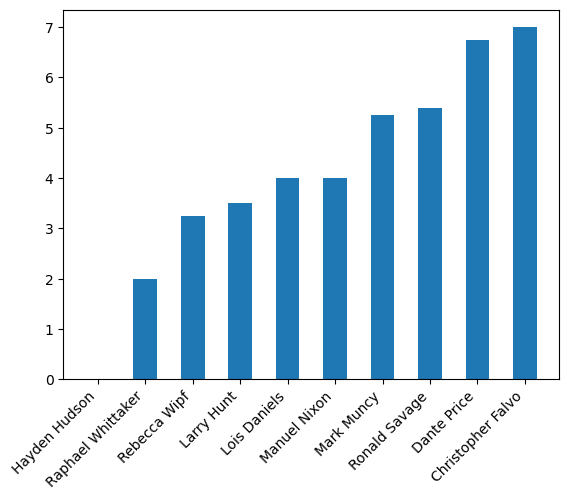

In [8]:
import matplotlib.pyplot as plt
plt.bar([student.name for student in student_list],[student.get_avg_grade() for student in student_list],width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [9]:
progression_lst=[0,0,0,0,0,0,0,0,0,0]

for student in student_list:
    progression_lst[int(student.get_progression()/10-1)]+=1

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

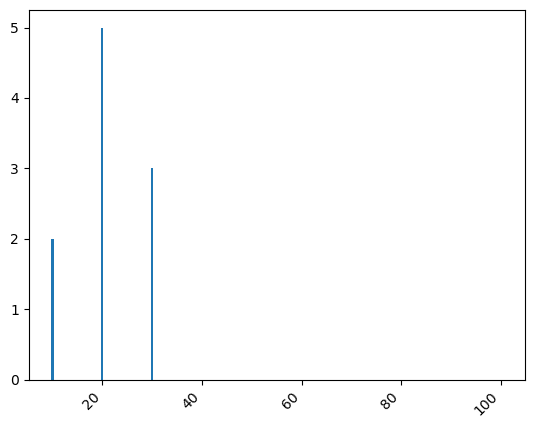

In [10]:
plt.bar([10,20,30,40,50,60,70,80,90,100],progression_lst,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [11]:
next(student_list[1].data_sheet)

Course('Sience', 'CL_2', 'Lars', 10.0, 2.0)

In [12]:
def get_closest_to_finish(students):
    closest = []
    
    for student in students:
        if len(closest) < 3:
            closest.append(student)
        else:
            index = 0
            for st in closest:
                if st.get_progression() < student.get_progression():
                    closest[index] = student
                    continue
                index += 1
                
    return closest

In [13]:
get_closest_to_finish(student_list)

[Student('Lois Daniels', 'female', DataSheet([Course('Biology', 'CL_5', 'Helga', 10.0, 10.0), Course('Math', 'CL_1', 'Hans', 10.0, -3.0), Course('History', 'CL_4', 'Sven', 10.0, 7.0), Course('Sience', 'CL_2', 'Lars', 10.0, 4.0), Course('English', 'CL_3', 'Peter', 10.0, 2.0)]), 'img_url', '4'),
 Student('Ronald Savage', 'male', DataSheet([Course('Biology', 'CL_5', 'Helga', 10.0, 12.0), Course('English', 'CL_3', 'Peter', 10.0, 2.0), Course('History', 'CL_4', 'Sven', 10.0, 12.0), Course('Math', 'CL_1', 'Hans', 10.0, 4.0), Course('Sience', 'CL_2', 'Lars', 10.0, -3.0)]), 'img_url', '10'),
 Student('Christopher Falvo', 'male', DataSheet([Course('Biology', 'CL_5', 'Helga', 10.0, 7.0), Course('History', 'CL_4', 'Sven', 10.0, 4.0), Course('Math', 'CL_1', 'Hans', 10.0, 12.0), Course('Sience', 'CL_2', 'Lars', 10.0, 12.0), Course('English', 'CL_3', 'Peter', 10.0, 0.0)]), 'img_url', '1')]

In [14]:
class NotEnoughStudentsException(Exception):
    pass

In [15]:
def get_closest_to_finish(students):
    closest = []
    
    if len(students) > 3:
        for student in students:
            if len(closest) < 3:
                closest.append(student)
            else:
                index = 0
                for st in closest:
                    if st.get_progression() < student.get_progression():
                        closest[index] = student
                        continue
                    index += 1
    else:
        raise NotEnoughStudentsException('List must contain at least three students')
                
    return closest

In [16]:
get_closest_to_finish(student_list[0:3])

NotEnoughStudentsException: List must contain at least three students

In [17]:
def get_closest_to_finish_csv(students):
    closest = []
    
    with open('3_best_students.csv','w') as file:
        csv_writer = csv.writer(file,delimiter=',')
        if len(students) > 3:
            for student in students:
                if len(closest) < 3:
                    closest.append(student)
                else:
                    index = 0
                    for st in closest:
                        if st.get_progression() < student.get_progression():
                            closest[index] = student
                            continue
                        index += 1
            csv_writer.writerow(['student_id','name'])
            for student in closest:
                csv_writer.writerow([student.stud_id,student.name])
        
        else:
            csv_writer.writerow(['Error'])
            csv_writer.writerow(['List must contain at least three students'])
            raise NotEnoughStudentsException('List must contain at least three students')
            

In [18]:
get_closest_to_finish_csv(student_list[0:3])

NotEnoughStudentsException: List must contain at least three students

In [20]:
def piechart(students):
    data ={}
    for student in students:
        if student.get_progression() in data.keys():
            data[student.get_progression()] +=1
        else:
            data[student.get_progression()] = 1
    fig1, ax1 = plt.subplots() # first returned is the containing figure (fig1), then the subplot Axe object(s) (ax1)
    ax1.pie(data.values(), labels=data.keys(),autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(data.values())), 
        #autopct=make_autopct(data.values()), 
        #autopct='%.1f', 
        # autopct= a format string like '%1.2f%%' for showing pct sign and 2 decimals
        shadow=True, startangle=90)
    ax1.set_aspect('equal')
    ax1.legend(data.keys(), loc='upper right') # use instead of labels in ax1.pie(...)
    #ax1.axis('equal')  
    #plt.tight_layout()
    plt.show()

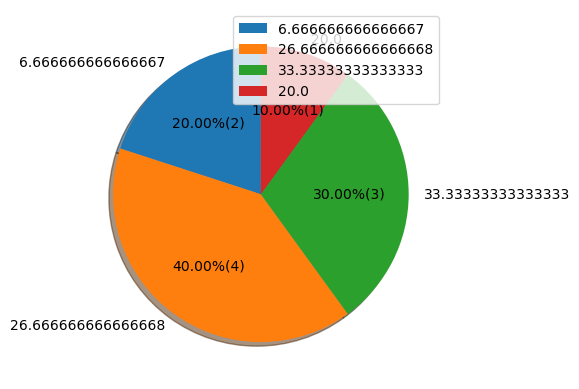

In [21]:
piechart(student_list)
